- T-test
    - 단일표본 t검정
    - 독립표본 t검정
    - 대응표본 t검정
- Chi Squared Test - 독립성 검정
- 회귀분석   

# T-test

1908년 기네스 맥주회사에서 일하던 화학자 윌리엄 고셋(William Gosset)이 맥주의 품질을 모니터하기 위한 방법으로 개발

## 단일표본 t검정

- 단일 표본의 평균 검정을 하기 위한 방법
- 모집단의 평균이 우리가 알고 있는 평균과 일치하는지 검정하기 위한 방법
- ex) 다이소 형광등의 평균 수명은 1만 시간으로 알려져 있다. 샘플 50개를 추출하여 평균 수명을 구했는데 이 표본평균은 1만 시간이라고 말할 수 있을까? X에 대해 One sample t-test를 하라

2010년 조사에 의하면 한국인의 1인 1일 평균 알코올 섭취량은 8.1g이다. 2023년 알코올 섭취량이 달라졌는지 조사하기 위해 10명을 무작위로 뽑아서 조사한 결과 다음과 같은 결과를 얻었다. 이 평균이 2010년 평균(모평균)이라 말할 수 있을까?

- 귀무가설: 표본평균과 모집단 평균은 같다(차이가 없음)
- 대립가설: 표본평균과 모집단 평균은 같지 않다(차이가 있음)

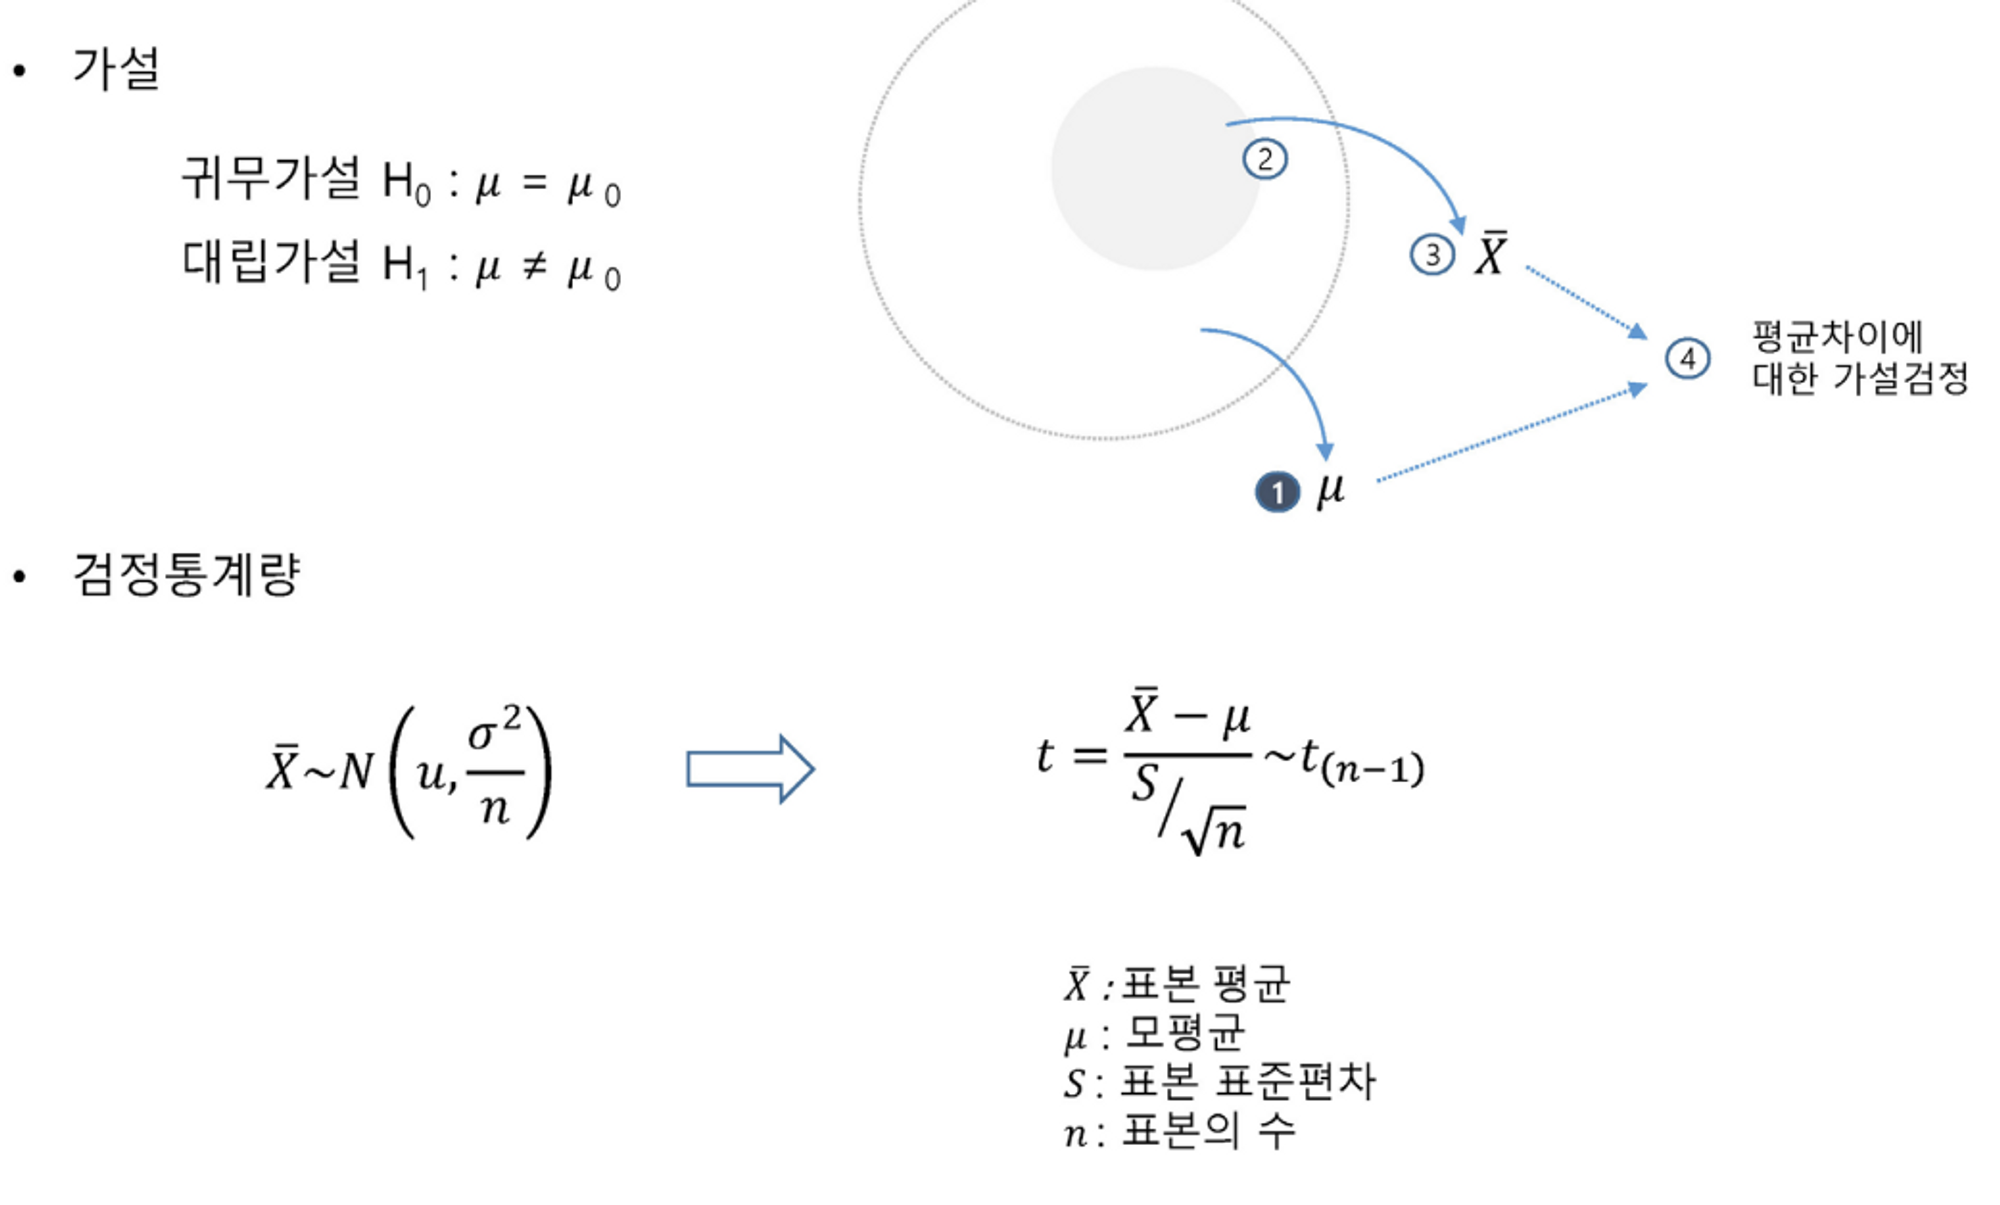

검정 통계량은 표본 데이터에서 계산되어 가설 검정에 사용되는 랜덤 변수입니다. 검정 통계량을 사용하여 귀무 가설의 기각 여부를 확인할 수 있습니다. 검정 통계량은 데이터를 귀무 가설 하에서 기대되는 값과 비교합니다. 검정 통계량은 p-값을 계산하기 위해 사용됩니다.

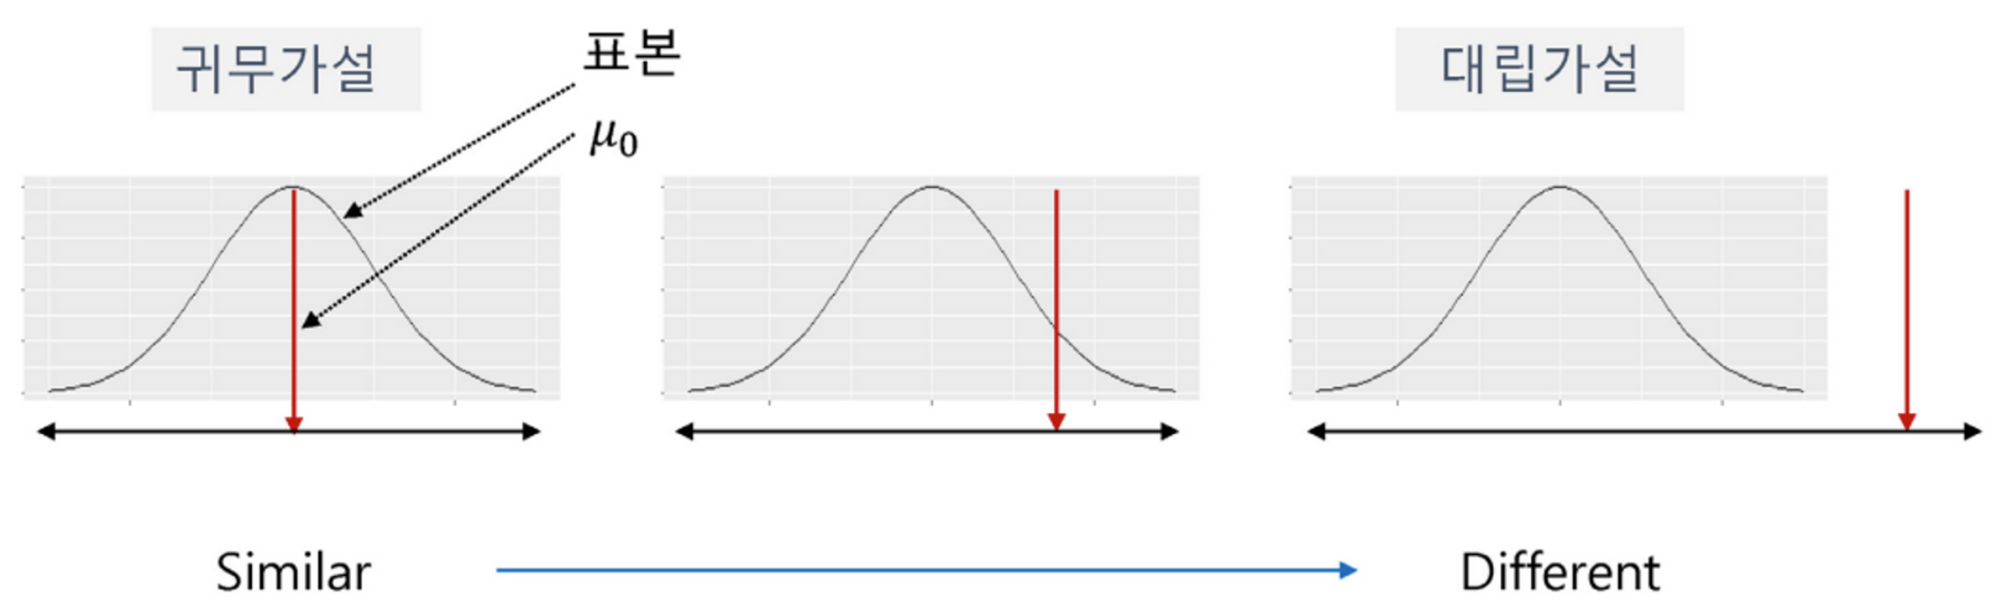

In [2]:
#
import pandas as pd
alcohol2023= pd.Series([15.5,11.21,12.67,8.87,12.15,9.88,2.06,14.5,0,4.97])
alcohol2023

0    15.50
1    11.21
2    12.67
3     8.87
4    12.15
5     9.88
6     2.06
7    14.50
8     0.00
9     4.97
dtype: float64

In [3]:
alcohol2023.mean()

9.181000000000001

2023년 alcohol의 표본평균은 9.181, 2010년 평균 8.1과의 차이는 1.081이다. t검정을 통해 1.081이라는 차이가 귀무가설하에서 우연히 발생할 수 있는 차이라고 보고 2023년 알코올 섭취량이 2010년 알코올 섭취량에 비해 특별히 다르지 않다는 결론을 내리느냐, 아니면 1.081이라는 차이를 통계적으로 유의미한한 차이가 있다는 결론(귀무가설 기각)을 내리느냐를 정할 수 있습니다.

q. alcohol에 대해서 단일표본 t검정 후 p-value를 소수점 둘째자리까지(셋째 자리에서 반올림) 구하시오

### stats.ttest_1samp()

In [4]:
from scipy import stats

In [5]:
stats.ttest_1samp(alcohol2023, 8.1)

TtestResult(statistic=0.6529981397731343, pvalue=0.5300829286757998, df=9)

In [6]:
round(stats.ttest_1samp(alcohol2023, 8.1)[1],2)

0.53

p-value : 0.53 > 0.05  
따라서, 2012년 평균 음주량은 8.1과 유의미한 차이가 없다. => 2010년 모평균과 같다

## 독립표본 t검정

### stats.ttest_ind()

- 두 집단간의 평균차이를 검정
- 가장 흔한 실험 연구는 실험군과 대조군에 서로 다른 개입을 적용시킨 후 두 집단의 평균이 같은지를 비교하여 개입 효과의 차이를 평가하는 것

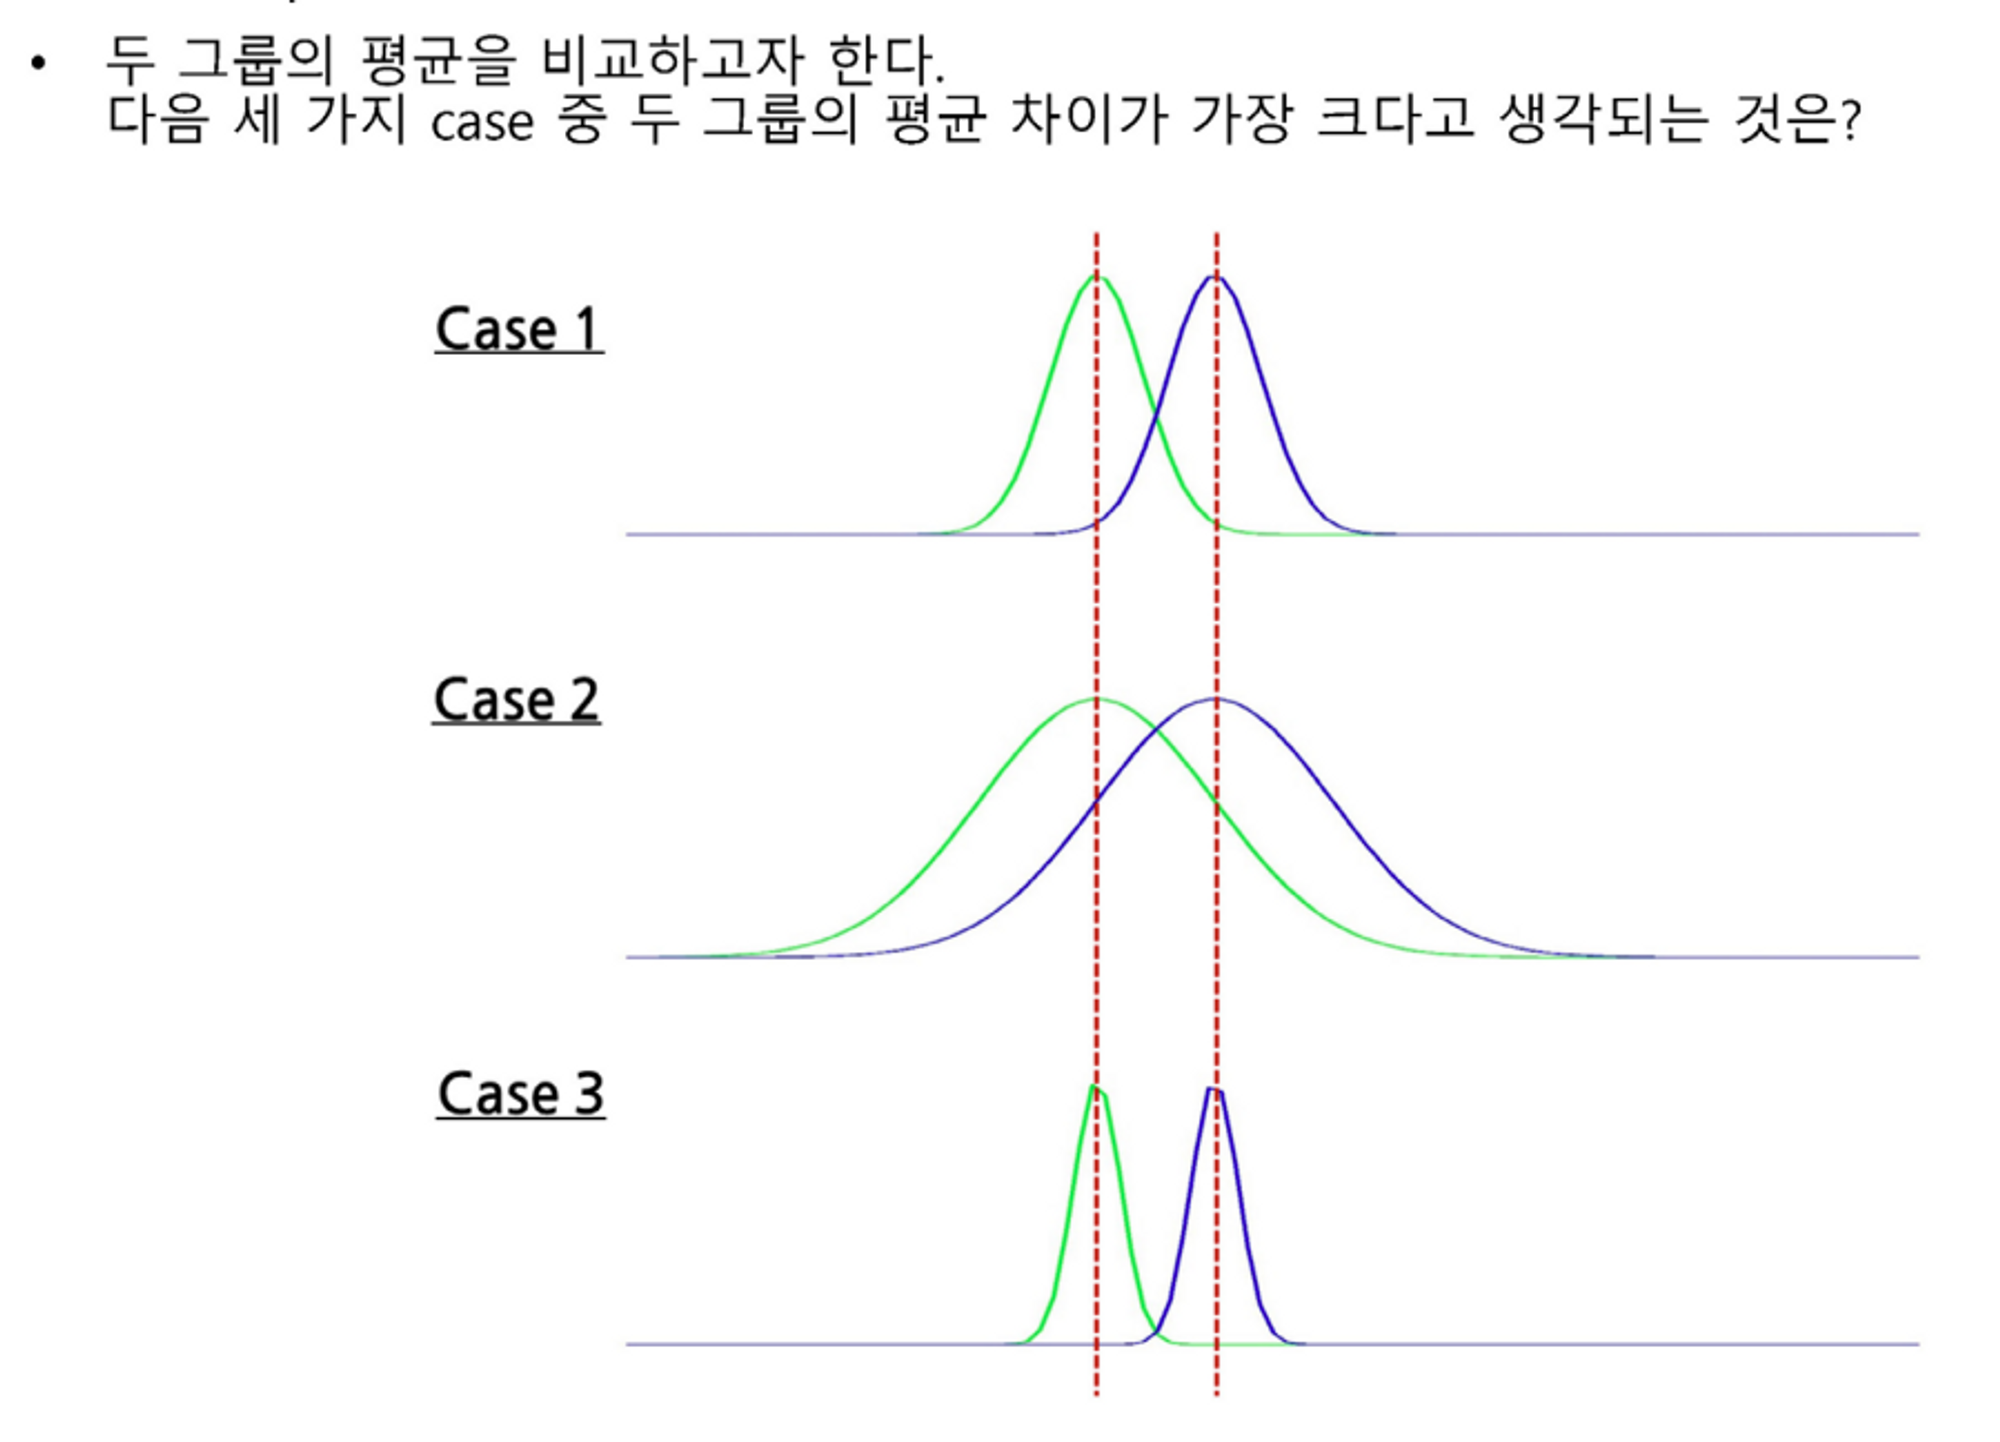

q. 아래는 a,b영업 지점의 각 8명의 업무수행률 데이터이다. 두 지점의 평균 차이가 있을까? 독립표본 t검정을 한 후 통계량과 p_value를 쓰시오. (두 지점은 등분산, 정규성을 따름)

In [7]:
#
부산지점 = [63.8, 56.4, 55.2, 58.5, 64.0, 51.6, 54.6, 71.0]
서울지점 = [75.5, 83.9, 75.7, 72.5, 56.2, 73.4, 67.7, 87.9]

In [8]:
stats.ttest_ind(부산지점, 서울지점) #등분산 일 때

Ttest_indResult(statistic=-3.587521542539111, pvalue=0.002971151455277398)

In [9]:
stats.ttest_ind(부산지점, 서울지점, equal_var=True) #등분산 일 때

Ttest_indResult(statistic=-3.587521542539111, pvalue=0.002971151455277398)

pvalue=0.05보다 작으므로 두 지점의 성적 평균은 차이가 있다

In [10]:
stats.ttest_ind(부산지점, 서울지점, equal_var = False) #이분산 일 때

Ttest_indResult(statistic=-3.587521542539111, pvalue=0.003667050743729099)

## 문제 03 유형 (DataSet_03.csv)

# q3-2

q. 성별에 따라 forehead_ratio평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
- (1번에서 푼 거 가져옴) df['forehead_ratio']=df.forehead_width_cm/df.forehead_height_cm
- 검정은 이분산을 가정하고 수행한다.
- 검정통계량의 추정치를 소수점 셋째 자리까지 반올림하여 기술하시오.
- 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y

> 성별에 따라 forehead_ratio평균에 차이가 있는지! -> 독립 표본 t검정!

In [11]:
# import pandas as pd

In [12]:
#
df =  pd.read_csv('../Datasets/Dataset_03.csv')
df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [13]:
from scipy.stats import ttest_ind

In [14]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['forehead_ratio']=df.forehead_width_cm/df.forehead_height_cm

In [16]:
Male = df.loc[df.gender=='Male','forehead_ratio']
Female= df.loc[df.gender=='Female','forehead_ratio']

In [17]:
Male

0       1.934426
2       1.873016
3       2.360656
5       1.911765
6       2.467742
          ...   
4987    1.951613
4992    2.014286
4994    1.842857
4995    1.782609
5000    2.851852
Name: forehead_ratio, Length: 2500, dtype: float64

In [18]:
ttest_ind(Male, Female, equal_var=False)

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

신뢰수준99% => 유의수준 0.01

> p_value가 0.01보다 작으니깐 귀무가설 기각!->  Y

### A. 
2.999, Y

## 대응표본 t검정

### stats.ttest_rel()
Calculate the t-test on **TWO RELATED** samples of scores, a and b.

- 두 집단의 자료를 쌍으로 묶을 수 있을 때= 표본이 독립적이지 않다.
- 두 집단의 자료를 쌍으로 묶어야 하기 때문에, 독립표본과는 달리 **두 집단의 자료 갯수가 동일**해야 함
- ex) 약물 투약 전과 후가 유의미한가? 마케팅 전 후의 고객만족도를 보고 마케팅의 효과가 유의미한가?

q. 복부 수술전 9명의 몸무게와 복부 수술후 몸무게 변화는 유의미한가?

In [19]:
#
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

In [20]:
stats.ttest_rel(baseline, follow_up)

TtestResult(statistic=3.6681166519351103, pvalue=0.006326650855933662, df=8)

pvalue=0.05보다 작으므로 복부 수술은 몸무게 변화에 유의미하게 영향을 끼친다

# 카이제곱 테스트 Chi Squared Test

## 독립성 검정
test of independence
- `두 범주형` 자료가 서로 독립인지 검정
- 분할표가 꼭 필요함

### stats.chi2_contingency(contingency)

"contingency: 우연성" 
-> 우연히 발생한 것이 아니라, 서로에게 의존적이거나 연관되어 있다는 의미 -> 서로 독립인지 검정

In [21]:
#
import pandas as pd
df=pd.read_csv('../Datasets/Patients.csv')
df[:3]

환자번호 당뇨 여부 비만 여부
0     1     Y     N
1     2     N     Y
2     3     N     N

q. 당뇨와 비만 사이의 관계에 대해 독립성 검정을 한 후 p_value를 구하시오

In [22]:
contingency=pd.crosstab(df['당뇨 여부'], df['비만 여부'])
contingency

비만 여부   N   Y
당뇨 여부        
N      62  22
Y      12   4

In [23]:
from scipy import stats

In [24]:
stats.chi2_contingency(contingency)
# Returns
# -------
# res : Chi2ContingencyResult
#     An object containing attributes:
# chi2 : float
#     The test statistic.
# p : float
#     The p-value of the test
# dof : int
#     Degrees of freedom
# expected : ndarray, same shape as `observed`
#     The expected frequencies, based on the marginal sums of the table.

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[62.16, 21.84],
       [11.84,  4.16]]))

In [25]:
chi, p, dof, expected = stats.chi2_contingency(contingency)

print(f"chi 스퀘어 값: {chi}",  
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{contingency}", sep = "\n\n" )

chi 스퀘어 값: 0.0

p-value (0.05): 1.0

자유도 수: 1

기대값: 
       0      1
0  62.16  21.84
1  11.84   4.16

측정값: 
비만 여부   N   Y
당뇨 여부        
N      62  22
Y      12   4


p-value (1) 가 유의수준(0.05)보다 높기 때문에 귀무가설을 기각하지 못합니다. 즉, 당뇨와 비만 사이의 관계는 `없다` 라고 결론내리게 됩니다.

# Dataset 5
# q5-2번

In [26]:
#
import pandas as pd
from scipy.stats import chi2_contingency

df =  pd.read_csv('../Datasets/Dataset_05.csv')
df.head()

ID  Age  Age_gr  Gender  Work_Experience  Family_Size  Ever_Married  \
0  462809   22      30       1              1.0          4.0             1   
1  462643   38      40       0              NaN          3.0             2   
2  466315   67      70       0              1.0          1.0             2   
3  461735   67      70       1              0.0          2.0             2   
4  462669   40      40       0              NaN          6.0             2   

   Graduated  Profession  Spending_Score  Var_1 Segmentation  
0          1           6               2      4          NaN  
1          2           3               0      4            A  
2          2           3               2      6          NaN  
3          2           8               1      6            B  
4          2           4               1      6            A

q. 이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에 영향을 미치는지 독립성 검정을 수행한다.  
수행 결과, p-value를 반올림하여 소수점 넷째 자리까지 쓰고,  
귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. (답안 예시) 0.2345, N 


- 분석을 위해 결측값을 모두 삭제한다.

In [27]:
df.isna().sum()

ID                   0
Age                  0
Age_gr               0
Gender               0
Work_Experience    829
Family_Size        335
Ever_Married         0
Graduated            0
Profession           0
Spending_Score       0
Var_1                0
Segmentation         2
dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.isna().sum()

ID                 0
Age                0
Age_gr             0
Gender             0
Work_Experience    0
Family_Size        0
Ever_Married       0
Graduated          0
Profession         0
Spending_Score     0
Var_1              0
Segmentation       0
dtype: int64

- 성별이 세분화(Segmentation)에 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를반올림하여 소수점 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. (답안 예시) 0.2345, N

In [30]:
contingency=pd.crosstab(df.Gender, df.Segmentation)

In [31]:
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=13.84425336760869, pvalue=0.0031250012836225765, dof=3, expected_freq=array([[ 763.27156595,  735.31950624,  802.04377781,  840.36514999],
       [ 929.72843405,  895.68049376,  976.95622219, 1023.63485001]]))

In [32]:
chi2_contingency(contingency)[1].round(4)

0.0031

In [33]:
chi2_contingency(contingency)[1]<0.05

True

> 특이한 언급 없으면 유의수준 0.05, 유의수준보다 작으니깐 귀무가설 기각 Y

### A. 0.0031, Y

# 회귀 분석

종속 변수와 독립 변수 간의 관계를 설명하는 수학적인 모델

이 모델은 종속 변수의 예측값을 독립 변수들의 가중치와 상수항의 합으로 표현

회귀 분석 패키지는 `statsmodels` 랑 `sklearn` 유명

통계적으로 자세히 분석할 거면 statsmodels, 예측만 할 거면 sklearn사용

statsmodels에서 회귀분석 코딩 두 가지 방법 제공

1. formula 작성해서 y~x1+x2 사용하는 방법
2. 참고) 전처리 후 OLS(y,x) 형태로 넣는 방법

### Dataset

In [34]:
#
boston=pd.read_csv('../Datasets/boston.csv')
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  PRICE  
0   4.98   24.0  
1   9.14   21.6  
2   4.03   34.7  
3   2.94   33.4  
4   5.33   36.2

## 1. formula 작성해서 `y~x1+x2` 사용하는 방법

In [35]:
from statsmodels.formula.api import ols

### 단순 회귀

q. 종속변수(PRICE), 독립변수(CRIM)을 사용하여 회귀분석을 한 후 R스퀘어 값을 작성하시오

In [36]:
formula = 'PRICE~CRIM'

- 모델

In [37]:
model=ols(formula, data=boston)

- 학습

In [38]:
result=model.fit()

- 평가

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.17e-19
Time:                        23:11:13   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 다중 회귀

q. 종속변수(PRICE), 독립변수(CRIM, RM)을 사용하여 회귀분석을 한 후 R스퀘어 값을 작성하시오

In [40]:
formula = 'PRICE~CRIM+RM'
model=ols(formula, data=boston)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           5.22e-86
Time:                        23:11:13   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 설명력

In [41]:
result.rsquared

0.5419591738494083

q. 종속변수(PRICE), 독립변수(전부)을 사용하여 회귀분석을 한 후 유의 수준(5%)을 만족하지 못하는 변수를 찾으시오

In [42]:
'PRICE~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

'PRICE~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

In [ ]:
#단순 방법
formula = 'PRICE~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

In [73]:
boston.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [74]:
'+'.join(boston.columns[:-1])

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

In [75]:
formula = 'PRICE~'+'+'.join(boston.columns[:-1])
formula

'PRICE~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT'

In [76]:
model=ols(formula, data=boston)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          2.23e-133
Time:                        23:08:18   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - p value

In [77]:
result.pvalues

Intercept    3.794467e-16
CRIM         2.605302e-04
ZN           7.719966e-04
INDUS        8.285201e-01
CHAS         1.173458e-03
NOX          1.502073e-06
RM           4.808025e-17
AGE          7.865948e-01
DIS          6.170894e-13
RAD          1.843595e-05
TAX          9.124487e-04
PTRATIO      4.630167e-12
LSTAT        6.392118e-25
dtype: float64

In [78]:
result.pvalues[result.pvalues>0.05].index

Index(['INDUS', 'AGE'], dtype='object')

### a. INDUS, AGE

- 회귀계수

In [79]:
result.params

Intercept    41.617270
CRIM         -0.121389
ZN            0.046963
INDUS         0.013468
CHAS          2.839993
NOX         -18.758022
RM            3.658119
AGE           0.003611
DIS          -1.490754
RAD           0.289405
TAX          -0.012682
PTRATIO      -0.937533
LSTAT        -0.552019
dtype: float64

q. 음의 계수는 몇 개?

In [80]:
sum(result.params<0)

6

# q 6-3번

### A. 13, 2

In [81]:
#
import pandas as pd
from statsmodels.formula.api import ols

df =  pd.read_csv('../Datasets/Dataset_06.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  2597000006  20150309T000000  347500.0         3       1.50         1180   
1  8813400345  20150414T000000  575000.0         2       1.00          980   
2   226059106  20150102T000000  489500.0         3       1.75         2090   
3  8645500270  20141028T000000  246000.0         4       1.75         1720   
4  7010700550  20141114T000000  595000.0         3       2.50         2030   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8353     1.0           0     0          3      7        1180   
1      3663     1.0           0     0          5      7         980   
2     65558     1.0           0     0          3      8        1330   
3      7455     1.0           0     0          4      7        1020   
4      5100     2.0           0     0          3      7        2030   

   sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
0              0      1960             0    98155           1710        8748  
1              0      1909             0    98105           1620        3706  
2            760      1977             0    98072           2450       47178  
3            700      1963             0    98058           1720        7700  
4              0      2008             0    98199           1790        4380

q. id, date, 그리고 zipcode를제외한 모든 변수를 독립변수로, price를종속변수로 하여 회귀분석을
수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀 모형에 남는 변수는 모두
몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3


- id, date, 그리고 zipcode를 제외한 모든 변수를 독립변수로, price를 종속변수로 하여 

In [92]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [99]:
col_X=df.columns

In [6]:
#단순 방법

In [100]:
col_X=col_X.drop('id')

In [101]:
col_X=col_X.drop('date')

In [102]:
col_X=col_X.drop('zipcode')

In [103]:
col_X=col_X.drop('price')

In [104]:
col_X

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [106]:
formula = 'price~' + '+'.join(col_X)

In [107]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [108]:
# 다른 방법

In [109]:
# 참고) 2-control-1-loop-for-while(solution)의 for-> comprehension
#hint: [col for col in col_X if col in []]

In [109]:
col_X=df.columns

In [110]:
[col for col in col_X]

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15']

In [111]:
col_X = [col for col in col_X if col not in ['id','date','zipcode','price']]

In [112]:
col_X

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

회귀분석을
수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀 모형에 남는 변수는 모두
몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3


- ols로 풀어보기, formula이용

In [115]:
formula = 'price~' + '+'.join(col_X)

In [116]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [117]:
model_ols=ols(formula, df)

In [118]:
result=model_ols.fit()

In [119]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:19:19   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3080      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.58e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 통계적 유의성

In [ ]:
result.pvalues<0.05

In [122]:
result.pvalues

Intercept         1.204633e-96
bedrooms          1.262643e-11
bathrooms         5.681393e-13
sqft_living       2.616953e-71
sqft_lot          9.532159e-01
floors            4.266372e-06
waterfront        1.931929e-56
view              5.028272e-17
condition         3.157318e-03
grade            1.760208e-156
sqft_above        1.431345e-11
sqft_basement     2.030015e-23
yr_built         1.717539e-122
yr_renovated      3.226128e-02
sqft_living15     2.352216e-03
sqft_lot15        1.017748e-01
dtype: float64

In [123]:
result.pvalues[result.pvalues<0.05]

Intercept         1.204633e-96
bedrooms          1.262643e-11
bathrooms         5.681393e-13
sqft_living       2.616953e-71
floors            4.266372e-06
waterfront        1.931929e-56
view              5.028272e-17
condition         3.157318e-03
grade            1.760208e-156
sqft_above        1.431345e-11
sqft_basement     2.030015e-23
yr_built         1.717539e-122
yr_renovated      3.226128e-02
sqft_living15     2.352216e-03
dtype: float64

In [124]:
col_result=result.pvalues[result.pvalues<0.05].index.drop('Intercept')

In [125]:
len(col_result)

13

- 회귀계수

In [126]:
sum(result.params[col_result]<0)

2

### A. 13, 2

## 2. 참고) 전처리 후 `OLS(y,x)` 형태로 넣는 방법

> sklearn과 헷갈릴 수도 있어 앞에 formula방법으로 기억하자

In [127]:
import statsmodels.api as sm

In [128]:
boston.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

In [129]:
X=boston[boston.columns[:-1]]
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7   5.33  
..       ...    ...  
501     21.0   9.67  
502     21.0   9.08  
503     21.0   5.64  
504     21.0   6.48  
505     21.0   7.88  

[506 rows x 12 columns]

In [130]:
X = sm.add_constant(X)  # 상수항 추가 
X

const     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0      1.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      1.0  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      1.0  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3      1.0  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4      1.0  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..     ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501    1.0  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502    1.0  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503    1.0  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504    1.0  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505    1.0  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7   5.33  
..       ...    ...  
501     21.0   9.67  
502     21.0   9.08  
503     21.0   5.64  
504     21.0   6.48  
505     21.0   7.88  

[506 rows x 13 columns]

"const"="Intercept"는 회귀 모델에서 상수항을 나타내며, 독립 변수들의 값이 모두 0일 때의 종속 변수의 예측값을 나타냅니다. 이는 회귀 모델에서의 y절편으로 이해할 수 있습니다. 

In [131]:
y= boston['PRICE']

In [132]:
model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 학습

In [133]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:25:10   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3080      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.58e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""